In [43]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
df.drop(columns=['CustomerID'], inplace=True)

In [11]:
X = df.to_numpy()

In [12]:
# Since the first column/attribute is of categorical type and each of them are unique, we use label encoder so that each
# of them get labelled with a unique integer
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 0] = labelencoder.fit_transform(X[:, 0])

In [16]:
# For the rest of the attribute values we use Min Max Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X[:,1:])
# Apply Min Max Scaling
X[:,1:] = scaler.transform(X[:,1:])

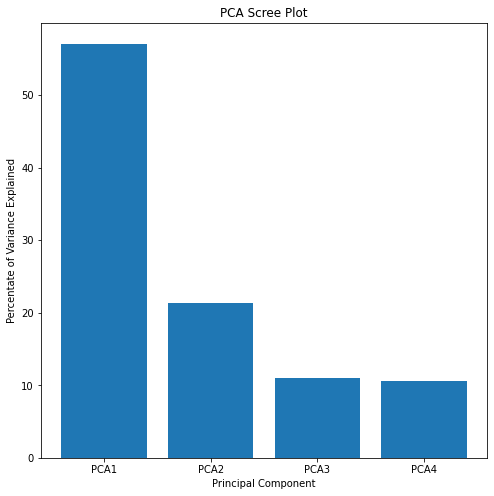

In [41]:
# Scree Plot
pca = PCA()
pca.fit(X)
percent_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
plt.figure(figsize=(8, 8))
plt.bar(x=["PCA"+str(i) for i in range(1, X.shape[1]+1)], height=percent_variance, tick_label=["PCA"+str(i) for i in range(1, X.shape[1]+1)])
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA Scree Plot')
plt.show()

In [42]:
# Apply PCA
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0  0.532955 -0.227841
1  0.513939 -0.493080
2 -0.446266  0.087079
3 -0.478796 -0.366617
4 -0.451984  0.003006


In [103]:
def _DBSCAN(eps, minpts):
  dbscan = DBSCAN(eps=eps, min_samples=minpts)
  dbscan.fit(X_principal)
  # print(dbscan.labels_)
  db1 = dbscan.labels_
  for j in set(db1):
    points = np.array([X_principal.to_numpy()[l] for l in range(len(db1)) if db1[l] == j])
    plt.scatter(points[:, 0], points[:, 1], s=7)
  plt.show()
  

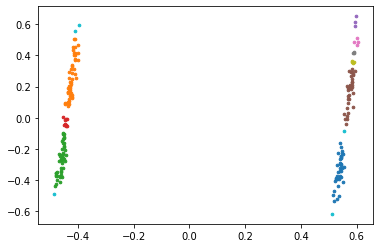

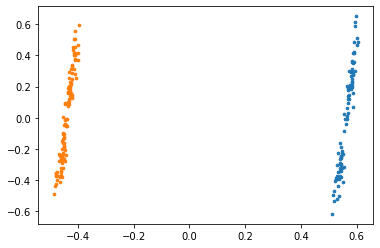

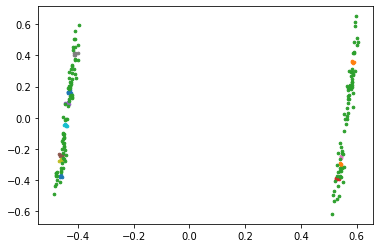

In [108]:
# db1 = _DBSCAN( 0.0375, 3)
eps = [0.0375, 0.5,0.01]
minpts = [3, 2, 4]
for i in range(len(eps)):
  _DBSCAN( eps[i], minpts[i])